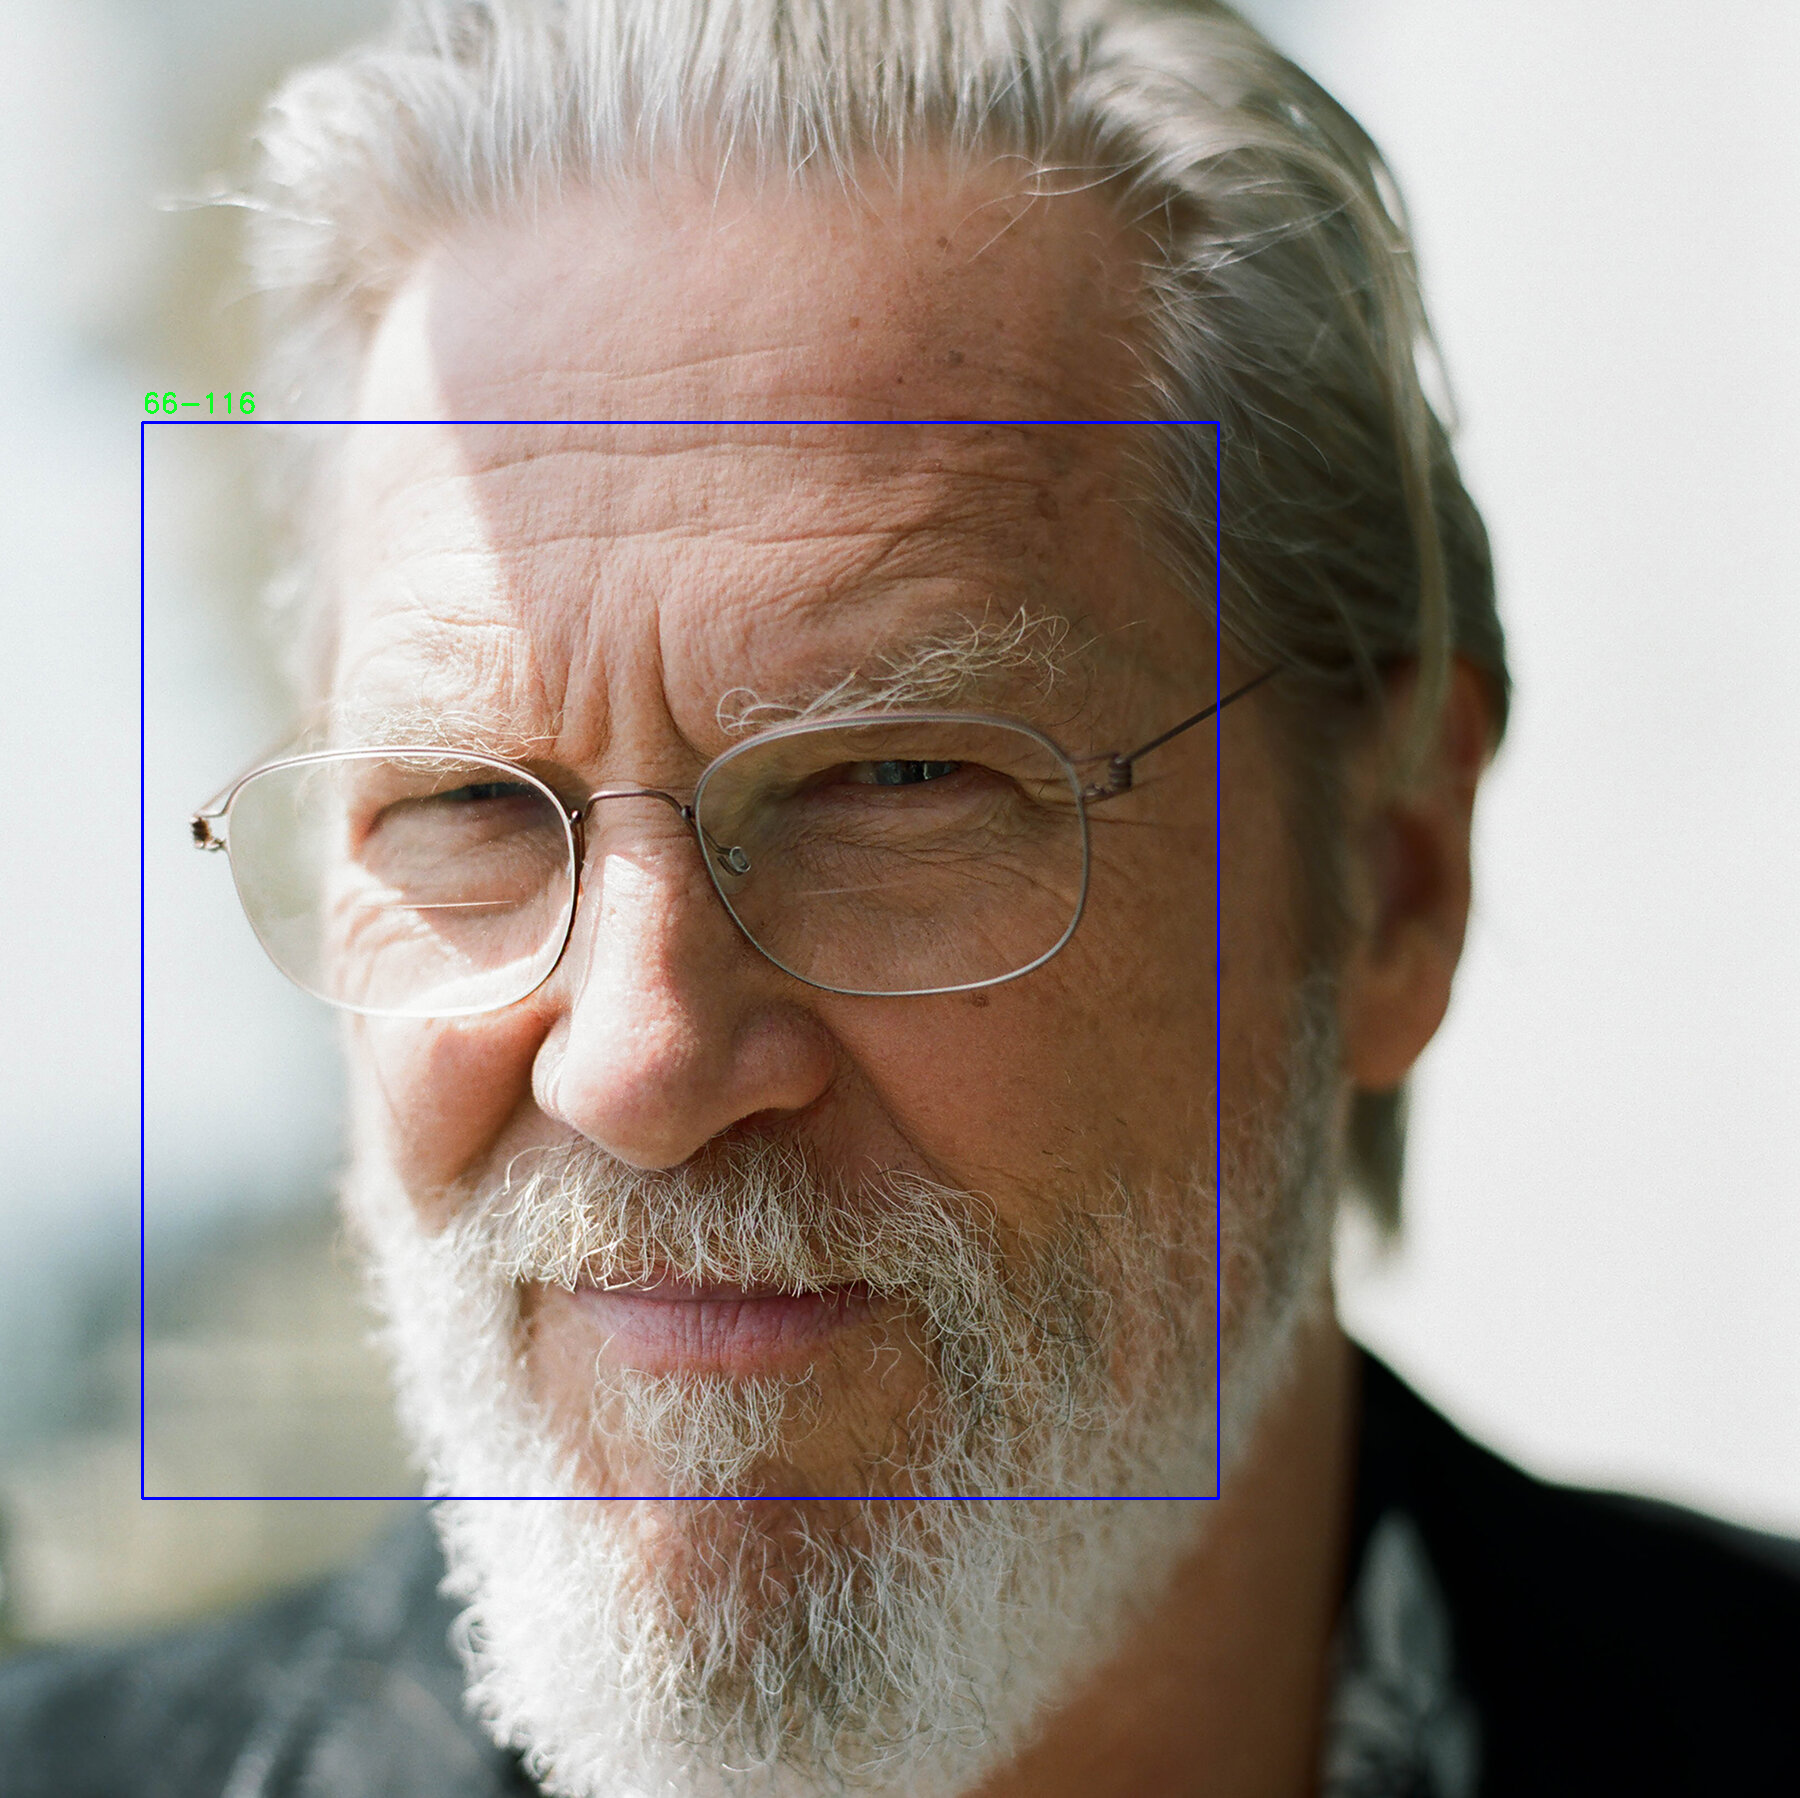

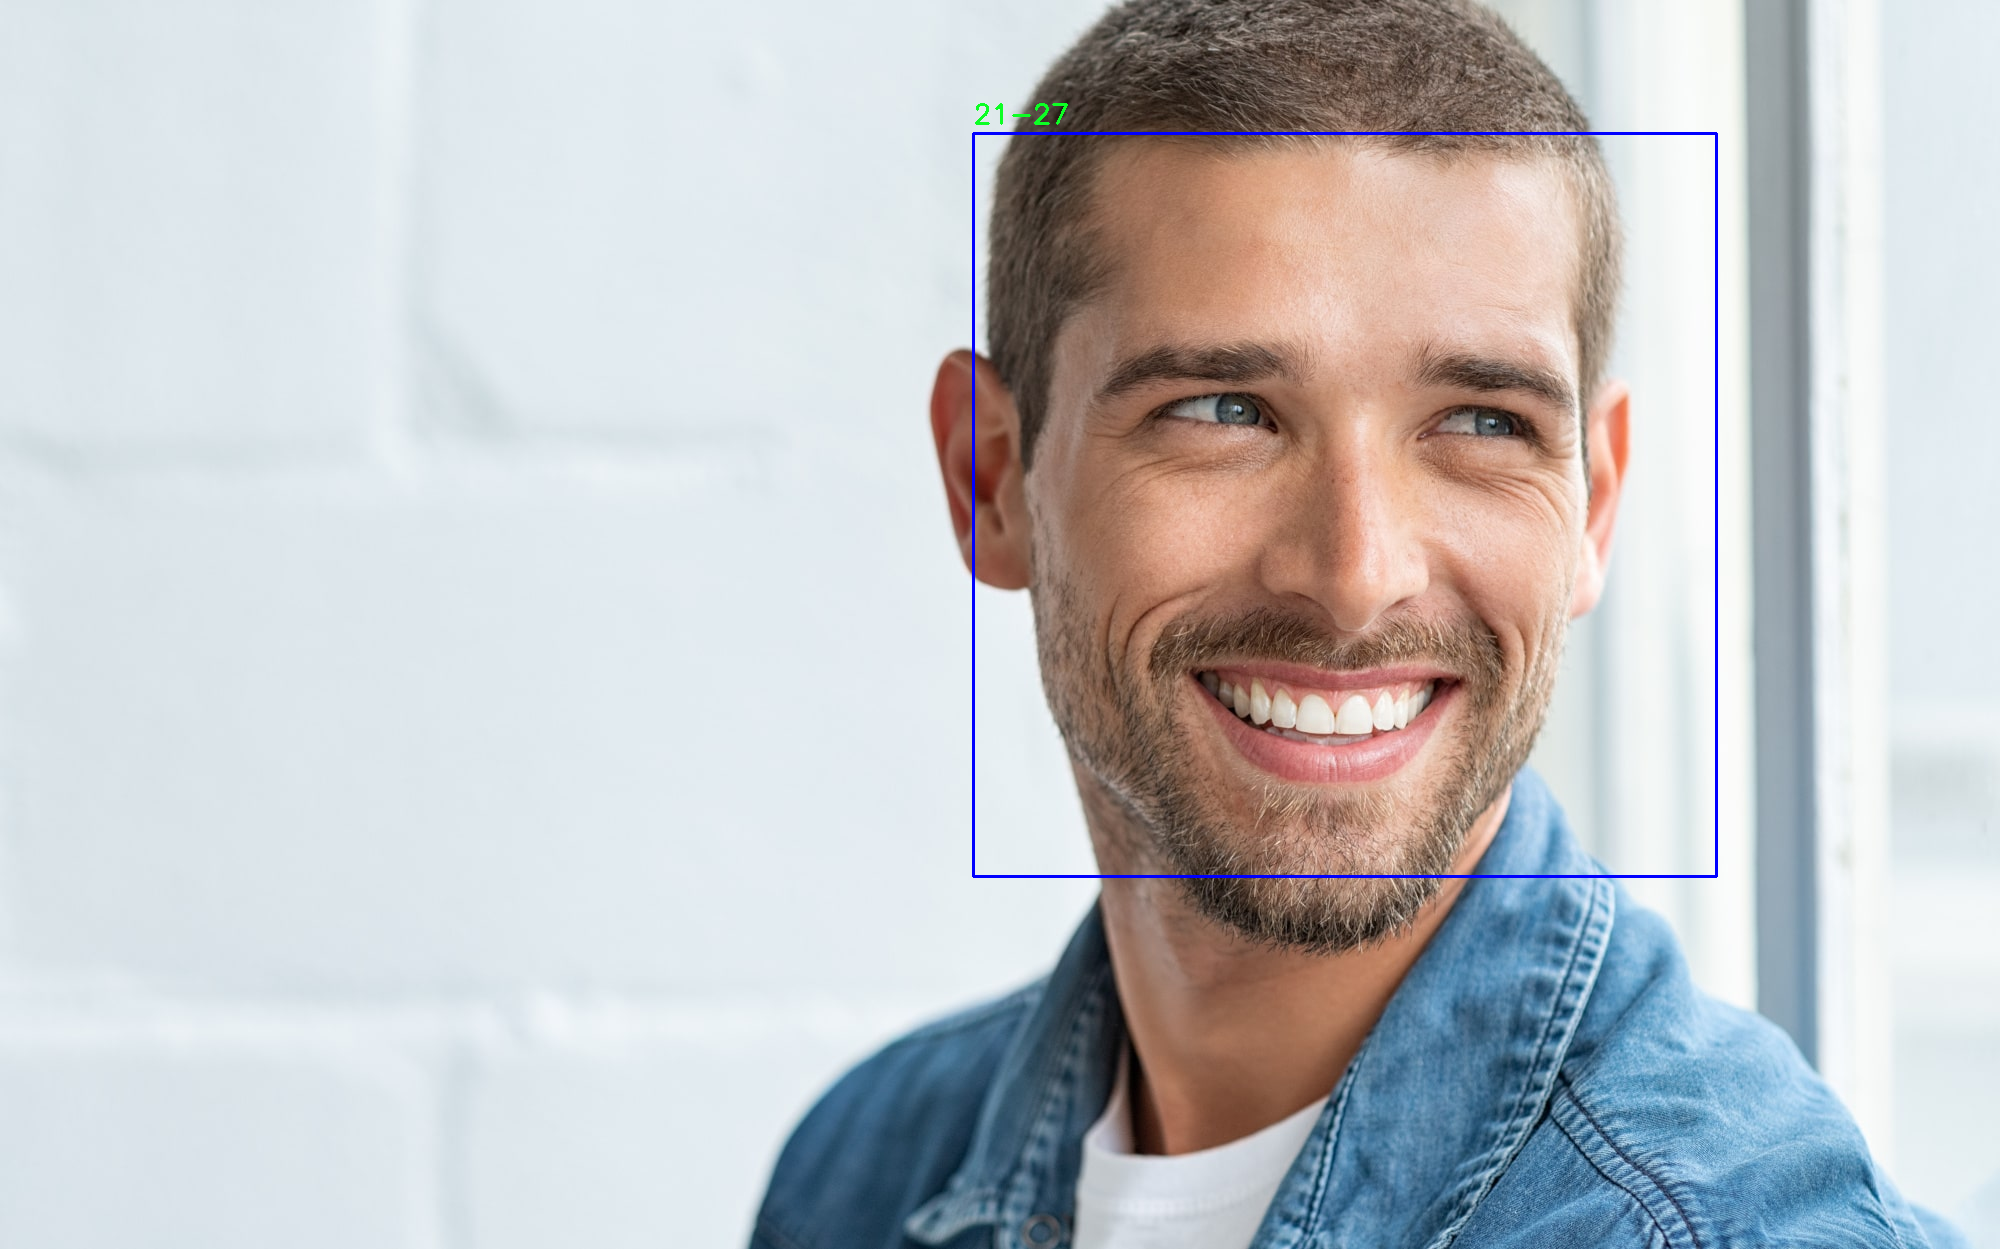

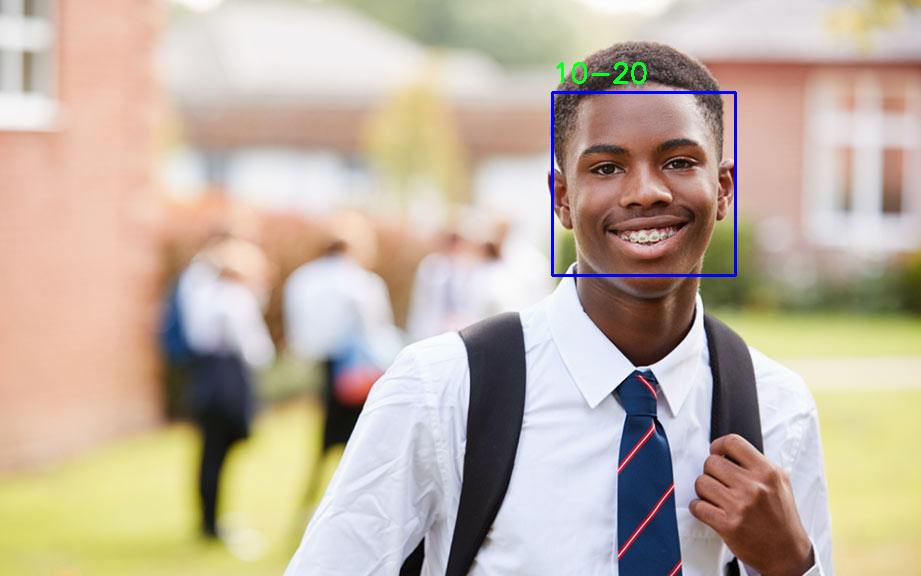

In [46]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

#train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='linear')
])
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
X_train = X_train / 255.0
X_test = X_test / 255.0
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
loss, mae = model.evaluate(X_test, y_test)
print("Test MAE:", mae)

#apply
image_files = {'man.jpg', 'man_2.jpg','boy_2.jpg'}
ranges = ['1-2', '3-9', '10-20', '21-27', '28-45', '46-65', '66-116']
def determine_age_range(age):
    if age >= 1 and age <= 2:
        return ranges[0]
    elif age >= 3 and age <= 9:
        return ranges[1]
    elif age >= 10 and age <= 20:
        return ranges[2]
    elif age >= 21 and age <= 27:
        return ranges[3]
    elif age >= 28 and age <= 45:
        return ranges[4]
    elif age >= 46 and age <= 65:
        return ranges[5]
    elif age >= 66 and age <= 116:
        return ranges[6]
    else:
        return 'Unknown'
for image_path, age in image_files.items():
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error reading {image_path}")
        continue
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = model.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    age_range = determine_age_range(age)
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(image, age_range, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)
    cv2_imshow(image)

#pretrained data is available with face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml') also.